In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load datasets
customers = pd.read_csv(r"C:\STUDI INDEPENDEN\DATA ANALIST - STUPEN\CAPSTONE PROJECT\sample_databrazilian-ecommerce\olist_customers_dataset.csv")
geolocation = pd.read_csv(r"C:\STUDI INDEPENDEN\DATA ANALIST - STUPEN\CAPSTONE PROJECT\sample_databrazilian-ecommerce\olist_geolocation_dataset.csv")
order_items = pd.read_csv(r"C:\STUDI INDEPENDEN\DATA ANALIST - STUPEN\CAPSTONE PROJECT\sample_databrazilian-ecommerce\olist_order_items_dataset.csv")
order_payments = pd.read_csv(r"C:\STUDI INDEPENDEN\DATA ANALIST - STUPEN\CAPSTONE PROJECT\sample_databrazilian-ecommerce\olist_order_payments_dataset.csv")
order_reviews = pd.read_csv(r"C:\STUDI INDEPENDEN\DATA ANALIST - STUPEN\CAPSTONE PROJECT\sample_databrazilian-ecommerce\olist_order_reviews_dataset.csv")
orders = pd.read_csv(r"C:\STUDI INDEPENDEN\DATA ANALIST - STUPEN\CAPSTONE PROJECT\sample_databrazilian-ecommerce\olist_orders_dataset.csv")
products = pd.read_csv(r"C:\STUDI INDEPENDEN\DATA ANALIST - STUPEN\CAPSTONE PROJECT\sample_databrazilian-ecommerce\olist_products_dataset.csv")
sellers = pd.read_csv(r"C:\STUDI INDEPENDEN\DATA ANALIST - STUPEN\CAPSTONE PROJECT\sample_databrazilian-ecommerce\olist_sellers_dataset.csv")
product_category_translation = pd.read_csv(r"C:\STUDI INDEPENDEN\DATA ANALIST - STUPEN\CAPSTONE PROJECT\sample_databrazilian-ecommerce\product_category_name_translation.csv")


In [3]:
# Merge dataframes to get a complete dataset
order_customer = orders.merge(customers, on='customer_id')
order_customer_payment = order_customer.merge(order_payments, on='order_id')
order_customer_payment_items = order_customer_payment.merge(order_items, on='order_id')


In [4]:
# Select relevant columns
data = order_customer_payment_items[['customer_id', 'price', 'freight_value', 'payment_value', 'order_id']]
data.head()


,customer_id,price,freight_value,payment_value,order_id
0,9ef432eb6251297304e76186b10a928d,29.99,8.72,18.12,e481f51cbdc54678b7cc49136f2d6af7
1,9ef432eb6251297304e76186b10a928d,29.99,8.72,2.00,e481f51cbdc54678b7cc49136f2d6af7
2,9ef432eb6251297304e76186b10a928d,29.99,8.72,18.59,e481f51cbdc54678b7cc49136f2d6af7
3,b0830fb4747a6c6d20dea0b8c802d7ef,118.70,22.76,141.46,53cdb2fc8bc7dce0b6741e2150273451
4,41ce2a54c0b03bf3443c3d931a367089,159.90,19.22,179.12,47770eb9100c2d0c44946d9cf07ec65d


In [5]:
# Handle missing values
data = data.dropna()

In [6]:
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['price', 'freight_value', 'payment_value']])


In [7]:
# Convert scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=['price', 'freight_value', 'payment_value'])


In [8]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


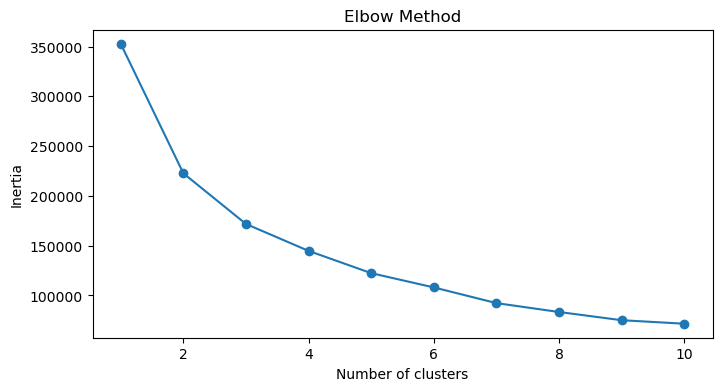

In [9]:
# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [10]:
# Train the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)


C:\DATA SCIENCE\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\DATA SCIENCE\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\DATA SCIENCE\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

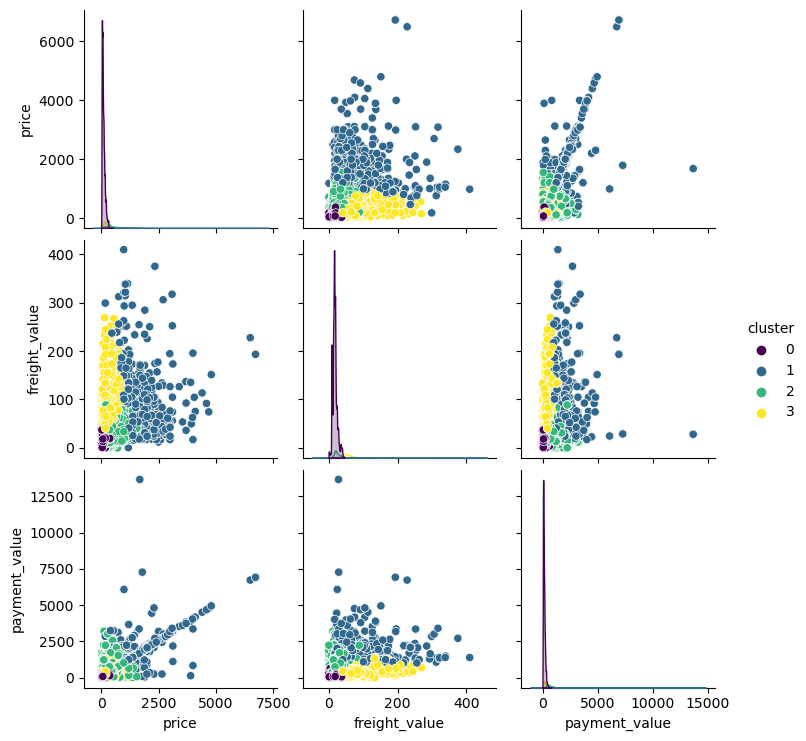

In [11]:
# Visualize the clusters
sns.pairplot(data, hue='cluster', palette='viridis')
plt.show()


In [12]:
# Pilih hanya kolom numerik untuk perhitungan rata-rata
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Tambahkan kembali kolom 'cluster' ke dalam data numerik
numerical_data['cluster'] = data['cluster']

# Hitung rata-rata dari setiap cluster untuk kolom numerik
cluster_summary = numerical_data.groupby('cluster').mean()

# Hitung jumlah data di setiap cluster
cluster_summary['count'] = data['cluster'].value_counts()

print(cluster_summary)

               price  freight_value  payment_value   count
cluster                                                   
0          82.211881      16.501423     118.049467  103373
1        1584.270037      76.936218    1956.580881     817
2         449.258945      25.756970     666.095276    6786
3         206.431206      62.488041     299.827626    6625


In [13]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_data, data['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6782741417651208


In [14]:
# Calculate the Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(scaled_data, data['cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')

Davies-Bouldin Index: 0.9581815937814675


In [15]:
# Calculate inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

Inertia: 144750.24834014382
